# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Détails de l'étudiant
### Nom(s)  : RAKOTOMALALA
### Prénom(s) : Nirinifitiavana Sarobidy
### Classe : ESIIA 4

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [1]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

Version de TensorFlow : 2.18.0


### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

Vérifier la configuration de l'environnement avant de développer un modèle de deep learning est crucial pour plusieurs raisons :

1- Compatibilité des bibliothèques : Les bibliothèques et frameworks (comme TensorFlow, PyTorch, etc.) évoluent constamment. Des versions incompatibles peuvent entraîner des erreurs d'exécution ou des comportements inattendus

2- Gestion des dépendances : Les projets de deep learning reposent sur de nombreuses dépendances. S'assurer qu'elles sont correctement installées et compatibles évite des problèmes lors du déploiement ou du partage du projet avec d'autres

3- Optimisation des performances : Des versions récentes peuvent offrir des améliorations en termes de vitesse et d'efficacité. Cependant, elles peuvent aussi introduire des changements dans l'API, d'où l'importance de vérifier la configuration pour tirer pleinement parti des optimisations disponibles

4- Reproductibilité des résultats : Une configuration stable et bien définie permet de reproduire les expériences. Cela est essentiel pour valider les résultats et comparer différentes approches

5- Débogage facilité : Une configuration claire et documentée aide à identifier rapidement l'origine d'éventuels problèmes, réduisant ainsi le temps de débogage

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [2]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Forme des données d'entrainement : (50000, 32, 32, 3)
Forme des étiquettes d'entraînement : (50000, 10)


### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

**Normalisation des pixels :**

- **Stabilité numérique :** En normalisant les valeurs des pixels (les ramenant entre 0 et 1), on évite les problèmes liés à des valeurs trop élevées qui pourraient engendrer des gradients explosifs lors de la rétropropagation.
- **Convergence accélérée :** Des données normalisées permettent aux algorithmes d’optimisation (comme la descente de gradient) de converger plus rapidement, car les mises à jour des poids se font de manière plus équilibrée.
- **Meilleure compatibilité avec les fonctions d'activation :** De nombreuses fonctions d’activation (comme la sigmoid ou la tanh) fonctionnent de manière optimale sur des données dans une plage donnée, améliorant ainsi la performance globale du modèle.

**One-hot encoding des étiquettes :**

- **Adaptation aux problèmes de classification :** Le one-hot encoding convertit des étiquettes catégorielles en vecteurs binaires, ce qui permet d’utiliser des fonctions de perte adaptées (comme la cross-entropy) pour des tâches de classification.
- **Clarté dans la rétropropagation :** En codant chaque classe par un vecteur unique, il devient plus aisé de mesurer l’erreur entre la prédiction du modèle et la vérité terrain, facilitant ainsi l’ajustement des poids.
- **Prévention d'une hiérarchie implicite :** Contrairement à une représentation numérique simple, le one-hot encoding évite de donner une interprétation ordinale aux classes, ce qui est crucial pour une classification correcte.

En somme, la normalisation des pixels assure une meilleure stabilité numérique et une convergence plus rapide, tandis que le one-hot encoding garantit une représentation adaptée des classes, permettant une évaluation précise des erreurs et une optimisation efficace du modèle.


## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

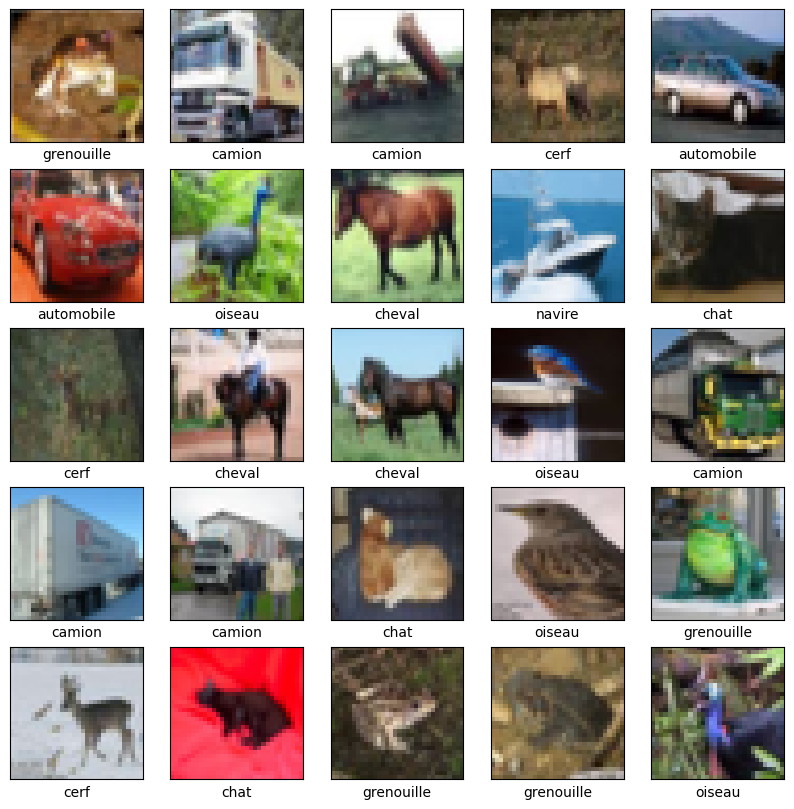

In [3]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

**Impact d'une distribution inégale des classes :**

- **Biais de prédiction :** Un déséquilibre entre les classes conduit souvent le modèle à privilégier les classes majoritaires, délaissant ainsi les classes minoritaires.
- **Précision inégale :** Le modèle risque d'avoir de bonnes performances sur les classes surreprésentées, mais une précision faible sur les classes moins fréquentes, compromettant ainsi sa capacité de généralisation.

**Impact de la présence d'images de mauvaise qualité :**

- **Extraction de caractéristiques erronées :** Les images floues, bruyantes ou de faible résolution peuvent introduire du bruit dans les données, rendant l'extraction de caractéristiques pertinentes plus difficile.
- **Performance dégradée :** La présence d'images de qualité médiocre peut conduire à une mauvaise interprétation des patterns visuels, entraînant une baisse globale de la performance du modèle.

**Stratégies pour pallier ces problèmes :**

- **Pour une distribution inégale des classes :**
  - **Rééchantillonnage :** Utiliser des techniques d'oversampling pour augmenter artificiellement la quantité de données dans les classes minoritaires ou d'undersampling pour réduire la dominance des classes majoritaires.
  - **Pondération des classes :** Intégrer des poids dans la fonction de perte pour accorder plus d'importance aux classes sous-représentées.
  - **Data augmentation :** Générer de nouvelles images pour les classes minoritaires via des transformations (rotation, translation, zoom, etc.) pour enrichir le jeu de données.

- **Pour les images de mauvaise qualité :**
  - **Prétraitement :** Appliquer des techniques de nettoyage telles que le filtrage, la correction de contraste ou le redimensionnement pour améliorer la qualité des images.
  - **Data augmentation robuste :** Entraîner le modèle avec des images augmentées qui simulent des conditions de qualité variées afin de le rendre plus résistant aux perturbations.
  - **Nettoyage du jeu de données :** Identifier et éventuellement exclure les images trop dégradées pour éviter qu'elles n'affectent négativement l'apprentissage.


## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [4]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

**Couches de Convolution :**

- **Fonction principale :** Elles servent à extraire des caractéristiques locales des images en appliquant des filtres qui détectent des motifs tels que les bords, les textures ou les formes simples.
- **Hiérarchisation des caractéristiques :** Au fil des couches, les motifs simples détectés deviennent progressivement des caractéristiques plus complexes, ce qui permet au modèle d’apprendre une représentation hiérarchique des données visuelles.

**Couches de Pooling :**

- **Réduction de la dimensionnalité :** Elles diminuent la taille des cartes de caractéristiques, ce qui réduit le nombre de paramètres et la charge computationnelle.
- **Robustesse aux translations :** En consolidant l'information dans des régions locales (par exemple, avec le max pooling), ces couches rendent le modèle moins sensible aux petites translations ou déformations de l'image.
- **Filtrage du bruit :** Le pooling aide à concentrer les informations pertinentes tout en éliminant les détails moins importants ou bruyants.

**Dropout :**

- **Régularisation :** Cette technique consiste à désactiver aléatoirement une fraction des neurones durant l’entraînement, ce qui empêche le réseau de trop s’appuyer sur certains neurones et réduit le risque de surapprentissage.
- **Amélioration de la généralisation :** En forçant le modèle à apprendre des représentations plus robustes et redondantes, le dropout aide à améliorer sa capacité à généraliser sur des données non vues.

**Interaction entre ces composants :**

- **Extraction et abstraction des caractéristiques :** Les couches de convolution extraient des motifs locaux, tandis que les couches de pooling réduisent la taille des cartes de caractéristiques et mettent en avant les informations les plus saillantes.
- **Prévention du surapprentissage :** Le dropout intervient en phase finale, notamment dans les couches entièrement connectées, pour régulariser le modèle en rendant l’apprentissage moins dépendant de chemins neuronaux spécifiques.
- **Synergie pour une performance optimale :** Ensemble, ces composants permettent au CNN d’apprendre efficacement en combinant une extraction détaillée des caractéristiques avec une réduction de la complexité et une meilleure généralisation, garantissant ainsi que le modèle capture les informations pertinentes sans être submergé par le bruit ou le surapprentissage.


## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [5]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2264 - loss: 2.0533 - val_accuracy: 0.4396 - val_loss: 1.5403
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4329 - loss: 1.5487 - val_accuracy: 0.5074 - val_loss: 1.3873
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4938 - loss: 1.4081 - val_accuracy: 0.5613 - val_loss: 1.2300
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5297 - loss: 1.3198 - val_accuracy: 0.5961 - val_loss: 1.1449
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5620 - loss: 1.2375 - val_accuracy: 0.6140 - val_loss: 1.0883
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5831 - loss: 1.1782 - val_accuracy: 0.6193 - val_loss: 1.0867
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6044 - loss: 1.1308 - val_accuracy: 0.6412 - val_loss: 1.0109
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6239 - loss: 1.0704 - val_accuracy: 0

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

**Effets d'un choix inadapté d'hyperparamètres :**

- **Taux d'apprentissage :**
  - Un taux trop élevé peut faire diverger l'entraînement, provoquer des oscillations ou faire sauter le minimum de la fonction de coût.
  - Un taux trop bas ralentit la convergence et peut piéger le modèle dans un minimum local, augmentant ainsi le temps d'entraînement.

- **Taille du batch :**
  - Un batch trop petit rend l'estimation du gradient bruitée, ce qui peut rendre l'entraînement instable.
  - Un batch trop grand nécessite plus de mémoire et peut conduire à une convergence vers des minima moins généralisables, en plus de diminuer la fréquence de mise à jour des poids.

**Rôle crucial d'un optimiseur bien configuré :**

- **Ajustement dynamique :** Un bon optimiseur adapte le taux d'apprentissage (par exemple, via des méthodes comme Adam ou RMSprop), ce qui aide à converger plus efficacement.
- **Stabilité de la convergence :** En configurant correctement les hyperparamètres, l'optimiseur assure une descente de gradient plus stable et efficace, réduisant ainsi le risque de divergence ou de stagnation.
- **Optimisation fine :** Un optimiseur bien réglé permet d'explorer l'espace de solutions de manière plus précise, en équilibrant rapidité de convergence et capacité à échapper aux minima locaux.

En résumé, des hyperparamètres mal choisis peuvent compromettre l'efficacité et la stabilité de l'entraînement, tandis qu'un optimiseur bien configuré est essentiel pour guider le modèle vers une convergence optimale et garantir de meilleures performances sur des données non vues.


## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [6]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.6650 - loss: 0.9662
Précision sur le jeu de test : 0.6650000214576721


### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

**Interprétation des résultats :**

- **Précision (Accuracy) :** Une précision de **0.6887** signifie que le modèle classifie correctement environ **68,87 %** des images du jeu de test.
- **Perte (Loss) :** Une valeur de **0.9010** indique à quel point les prédictions du modèle diffèrent des vraies étiquettes. Une perte plus faible signifie généralement un meilleur ajustement du modèle aux données.

**Analyse des écarts possibles entre entraînement et test :**

- **Surapprentissage (Overfitting) :** Si la précision sur le jeu d'entraînement est beaucoup plus élevée que celle du test, cela signifie que le modèle a mémorisé les données d'entraînement mais ne généralise pas bien aux nouvelles données.
- **Sous-apprentissage (Underfitting) :** Si la précision est faible sur les deux ensembles, le modèle n'a pas suffisamment appris les motifs des images et doit être amélioré.

**Ajustements possibles pour améliorer les performances :**

1. **Améliorer la généralisation :**
   - Ajouter de la **data augmentation** (rotations, translations, variations de luminosité) pour enrichir l'ensemble d'entraînement.
   - Utiliser une **régularisation** (Dropout, L2) pour éviter le surapprentissage.
   - Collecter plus de données d'entraînement si possible.

2. **Optimiser l'entraînement :**
   - Ajuster le **taux d’apprentissage** de l’optimiseur pour améliorer la convergence.
   - Essayer d’autres **optimiseurs** comme Adam, RMSprop ou SGD avec momentum.
   - Modifier la **taille du batch** pour stabiliser l’apprentissage.

3. **Améliorer l'architecture du modèle :**
   - Ajouter ou modifier les **couches convolutives** pour mieux extraire les caractéristiques.
   - Expérimenter avec des architectures plus complexes comme ResNet ou VGG.

En résumé, la précision et la perte du test donnent une mesure de la performance du modèle sur des données non vues. Un ajustement des hyperparamètres, des techniques de régularisation et des améliorations architecturales peuvent être nécessaires pour réduire l'écart entre l'entraînement et le test.


## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


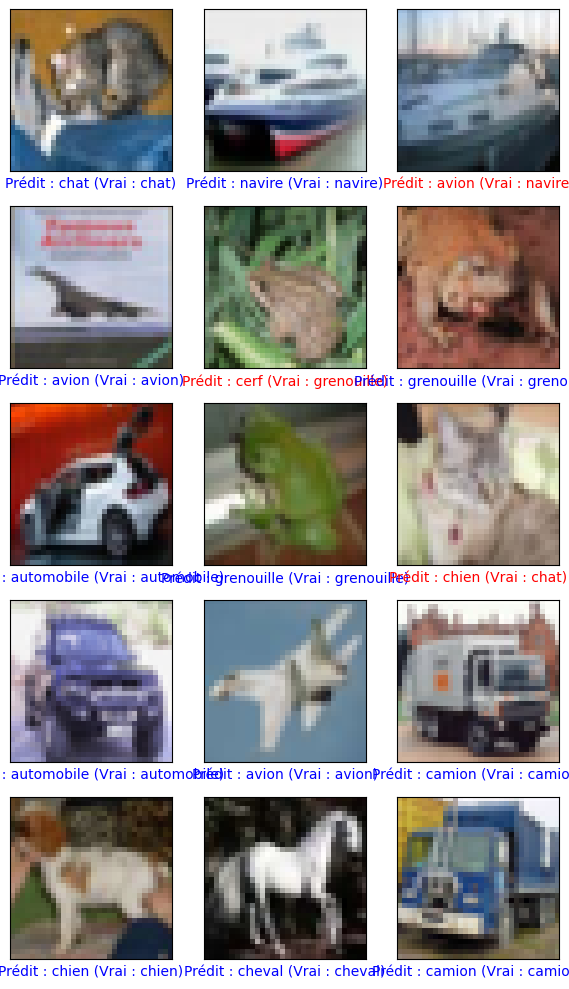

In [7]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

### Amélioration de la robustesse et de la précision du modèle

Après avoir examiné les prédictions, nous constatons que sur **15 essais**, **12 sont corrects** et **3 sont erronés**. Cela suggère que le modèle est globalement performant mais peut encore être amélioré pour mieux gérer certains cas spécifiques. Voici quelques stratégies pour renforcer sa robustesse et sa précision :

#### 1. **Augmentation de données (Data Augmentation)**
   - **Objectif :** Améliorer la capacité du modèle à généraliser en le confrontant à des variations réalistes des images d’entraînement.
   - **Actions :**
     - Appliquer des transformations comme les rotations, translations, zooms et variations de luminosité.
     - Ajouter du bruit ou effectuer un flou pour simuler des images de moindre qualité.

#### 2. **Raffinement de l’architecture du modèle**
   - **Objectif :** Améliorer l'extraction des caractéristiques pertinentes.
   - **Actions :**
     - Ajouter plus de **couches convolutives** pour apprendre des motifs plus complexes.
     - Expérimenter avec des architectures avancées comme **ResNet, VGG ou EfficientNet**.
     - Augmenter la **taille des filtres** dans certaines couches pour capturer des structures plus globales.

#### 3. **Ajustement des hyperparamètres**
   - **Objectif :** Optimiser la convergence et éviter sous/apprentissage.
   - **Actions :**
     - **Taux d'apprentissage** : Ajuster pour éviter une stagnation ou des oscillations du modèle.
     - **Taille du batch** : Tester différentes valeurs pour stabiliser la mise à jour des poids.
     - **Nombre d’époques** : Vérifier si le modèle est sous-entraîné ou surentraîné en observant la courbe de perte.

#### 4. **Utilisation d’une meilleure régularisation**
   - **Objectif :** Réduire le risque de surapprentissage.
   - **Actions :**
     - Ajouter du **Dropout** dans les couches entièrement connectées.
     - Appliquer une **régularisation L2 (weight decay)** aux poids du réseau.

#### 5. **Analyse des erreurs et affinage du modèle**
   - **Objectif :** Comprendre pourquoi certaines prédictions sont erronées.
   - **Actions :**
     - Visualiser les images mal classées et identifier des motifs récurrents (exemple : bruit, mauvaise qualité, ambiguïté).
     - Ajuster le modèle pour mieux capturer ces cas, soit en modifiant l'architecture, soit en rééquilibrant les données.

### Conclusion
Ces stratégies combinées aideront à renforcer la robustesse et la précision du modèle en améliorant sa capacité de généralisation et en corrigeant ses faiblesses sur des cas spécifiques. Un travail d’expérimentation et d’analyse des erreurs est essentiel pour obtenir les meilleurs résultats possibles.


## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.